In [2]:
# to manipulate data
import pandas as pd

# for interactive plots
import plotly.express as px

# to manipulate and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

In [3]:
AD06 = gpd.read_file('AD06.geojson')

In [4]:
AD06.info(verbose=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 142 columns):
 #    Column                       Dtype              
---   ------                       -----              
 0    OBJECTID_1                   float64            
 1    AIN                          object             
 2    APN                          object             
 3    SitusHouse                   object             
 4    SitusFract                   object             
 5    SitusDirec                   object             
 6    SitusUnit                    object             
 7    SitusStree                   object             
 8    SitusAddre                   object             
 9    SitusCity                    object             
 10   SitusZIP                     object             
 11   SitusFullA                   object             
 12   TaxRateAre                   object             
 13   TaxRateCit                   object             
 14 

In [5]:
columns_to_keep = ['SitusAddre','UseType', 'UseDescrip', 'CENTER_LAT_y', 'CENTER_LON_y', 'geometry']

In [6]:
AD06_clipped = AD06[columns_to_keep]

In [7]:
AD06_clipped.head()

SitusAddre      UseType           UseDescrip  CENTER_LAT_y  \
0          999 N BROADWAY   Commercial       Hotel & Motels     34.066669   
1  918 W COLLEGE ST   317  Residential               Single     34.066379   
2            908 AVILA ST   Industrial  Heavy Manufacturing     34.057575   
3    716 NEW DEPOT ST   A  Residential               Single     34.064930   
4           734 N HILL PL  Residential            Two Units     34.062405   

   CENTER_LON_y                                           geometry  
0   -118.236365  POLYGON Z ((-118.23615 34.06662 0.00000, -118....  
1   -118.245243  POLYGON Z ((-118.24515 34.06608 0.00000, -118....  
2   -118.232612  POLYGON Z ((-118.23247 34.05774 0.00000, -118....  
3   -118.242581  POLYGON Z ((-118.24270 34.06474 0.00000, -118....  
4   -118.242174  POLYGON Z ((-118.24245 34.06255 0.00000, -118....

In [9]:
building_counts = AD06_clipped.value_counts(['UseType']).reset_index(name="count")
building_counts

UseType  count
0    Residential    544
1     Commercial    333
2     Industrial    116
3     Government     41
4  Miscellaneous     36
5  Institutional     12
6   Recreational     10

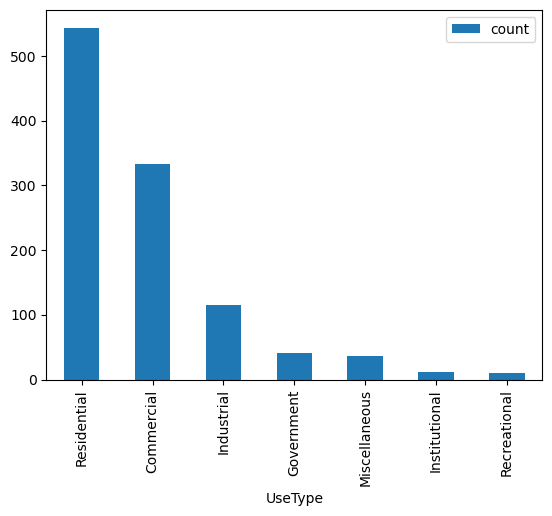

In [11]:
building_counts.plot.bar(x='UseType');

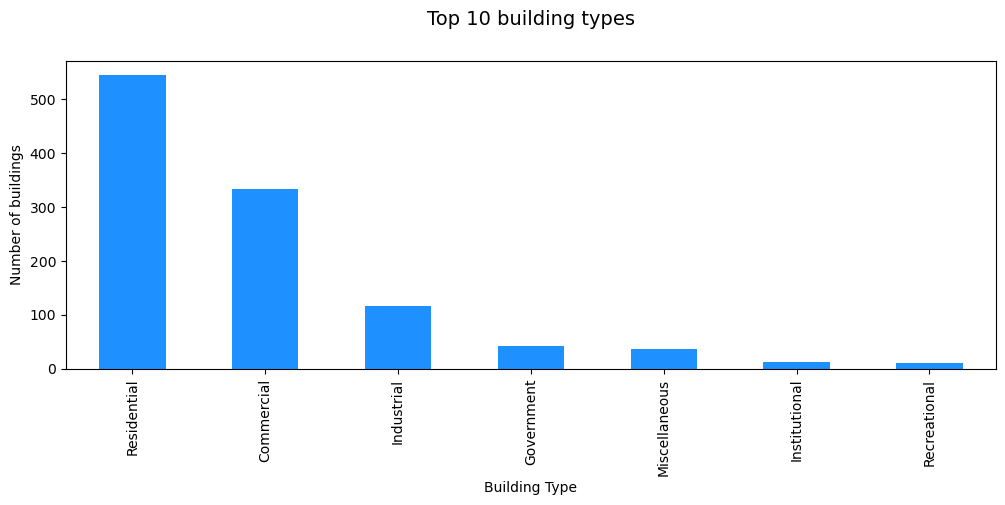

In [15]:
fig, ax = plt.subplots(figsize=(12,4))

building_counts[:10].plot.bar(ax=ax,
                                      x='UseType',
                                      y='count',
                                      legend=False,
                                      color='dodgerblue'
                                      )
ax.set_xlabel('Building Type') # override x label
ax.set_ylabel('Number of buildings') # override y label
ax.set_title("Top 10 building types\n",fontsize=14,pad=10); # multi-line title with paddin

In [13]:
import plotly.io as pio
pio.templates.default = "plotly_white"

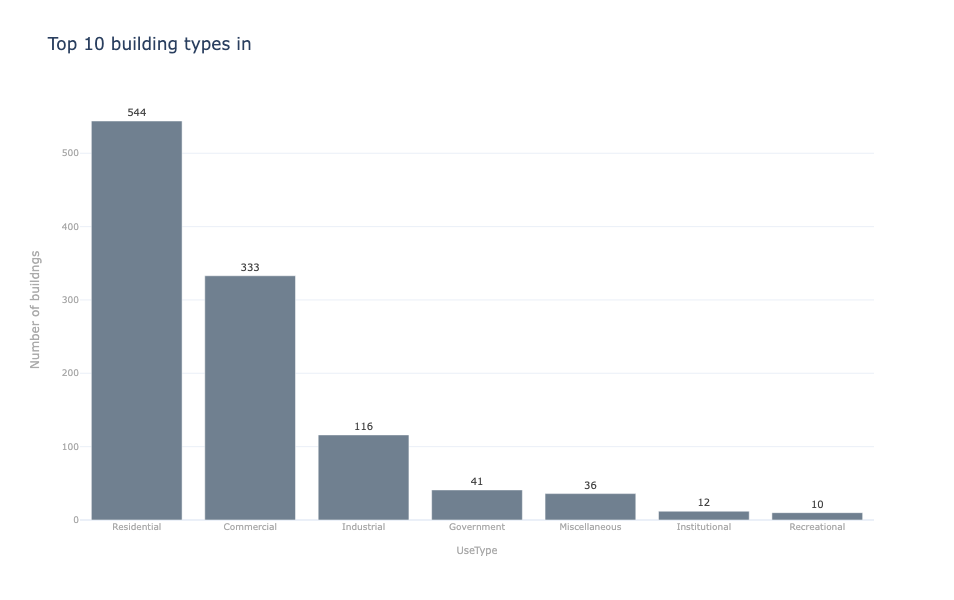

In [17]:
# bar chart
fig = px.bar(building_counts.head(10),
        x='UseType',
        y='count',
        title="Top 10 building types in ", # title
        text_auto = True,
        height=600,
        width=900,
        color_discrete_sequence =['slategray']*len(building_counts), # single color for all the bars
        labels={
                'count': 'Number of buildngs',
                'building': 'Type of building',
        })

# bar label
fig.update_traces(textposition='outside',textfont_size=10,textfont_color='#444')

# axes labels
fig.update_yaxes(title_font_size=12,title_font_color='#aaa',tickfont_color='#aaa',tickfont_size=9)
fig.update_xaxes(title_font_size=10,title_font_color='#aaa',tickfont_color='#aaa',tickfont_size=9)

# show the figure
fig.show()

<AxesSubplot: >

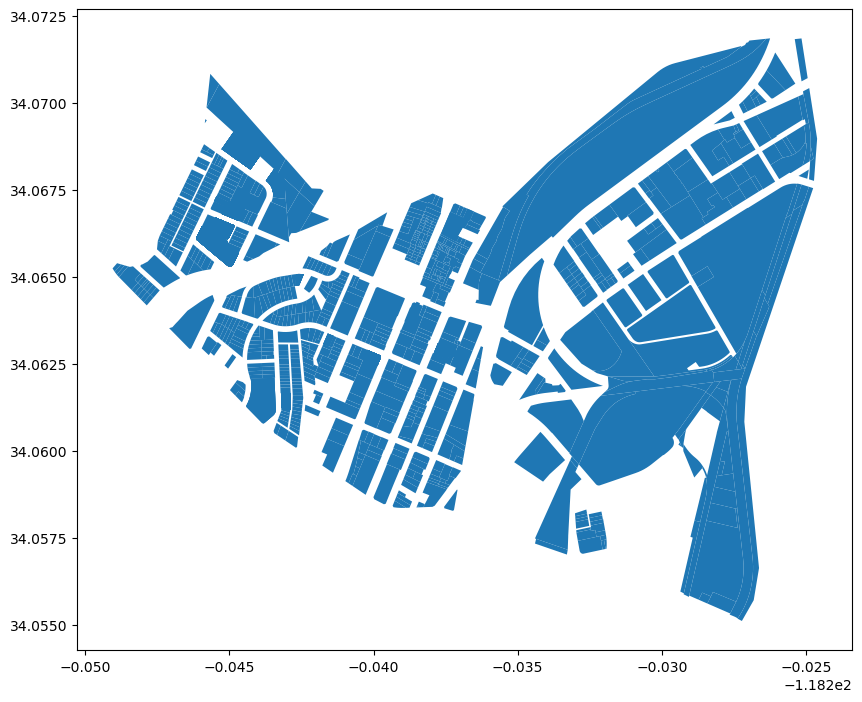

In [18]:
AD06_clipped.plot(figsize=(10,10))

<AxesSubplot: >

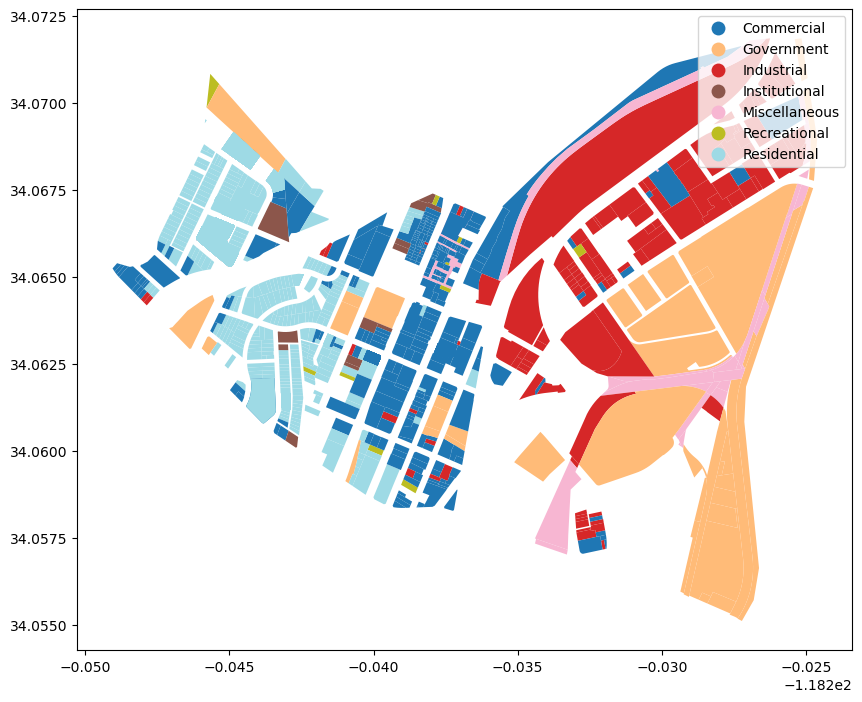

In [19]:
AD06_clipped.plot(figsize=(10,10),
         column='UseType',
         cmap='tab20',
         legend=True)

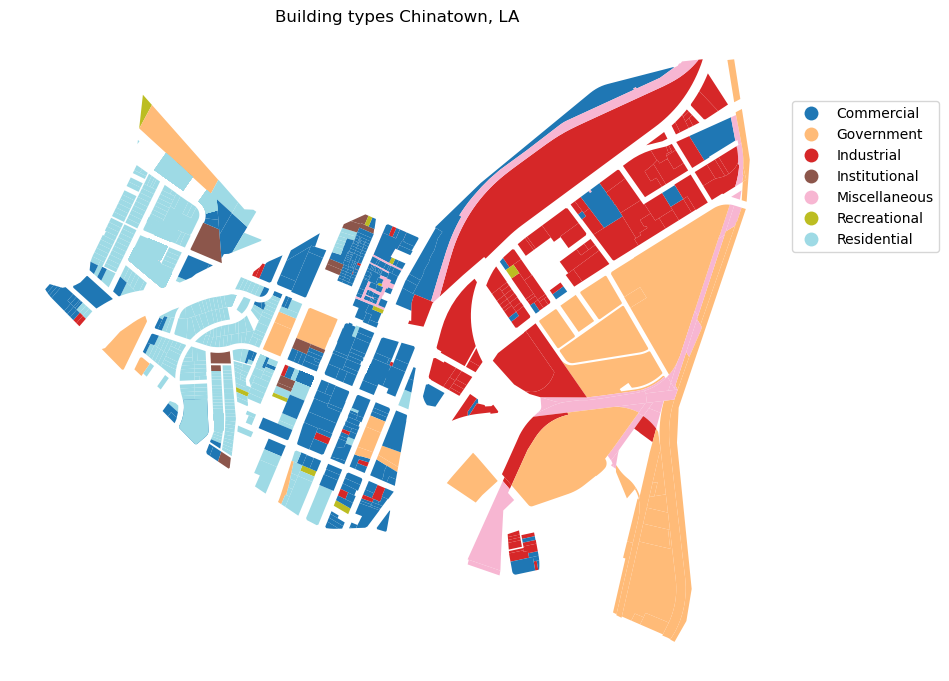

In [21]:
fig, ax = plt.subplots(figsize=(10,10))

# create the map plot
AD06_clipped.plot(ax=ax,
         column='UseType',
         cmap='tab20',
         legend=True,
         legend_kwds={'loc':'upper left','bbox_to_anchor':(1,.9)})

# add a title
ax.set_title('Building types Chinatown, LA')

# get rid of the axis
ax.axis('off');

In [22]:
# get min/max bounds of lat/lon
minx = AD06_clipped.total_bounds[0]
miny = AD06_clipped.total_bounds[1]
maxx = AD06_clipped.total_bounds[2]
maxy = AD06_clipped.total_bounds[3]

In [24]:
buildingtypes = AD06_clipped['UseType'].unique().tolist()
buildingtypes

['Commercial',
 'Residential',
 'Industrial',
 'Miscellaneous',
 'Government',
 'Institutional',
 'Recreational',
 None]

TypeError: can only concatenate str (not "NoneType") to str

Error in callback <function _draw_all_if_interactive at 0x7f21ac0ef0a0> (for post_execute):


ValueError: cannot convert float NaN to integer

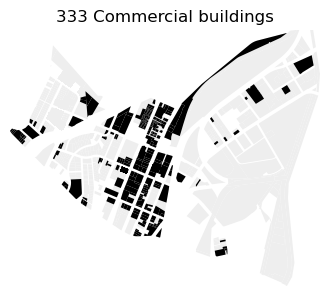

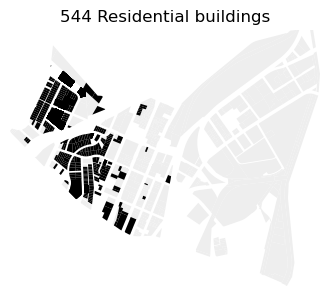

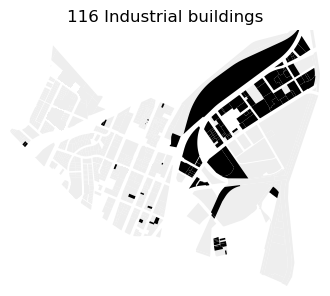

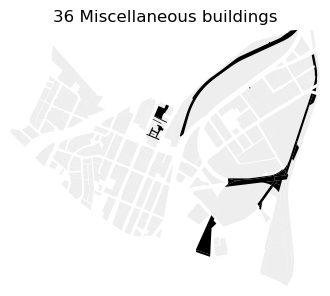

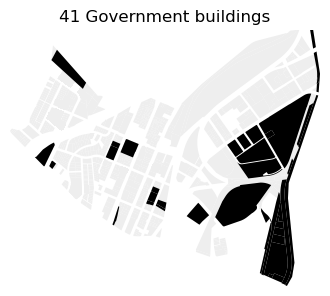

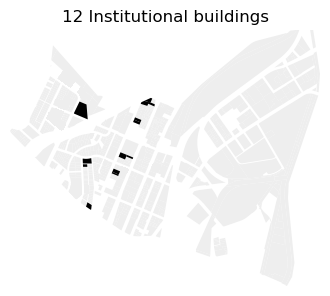

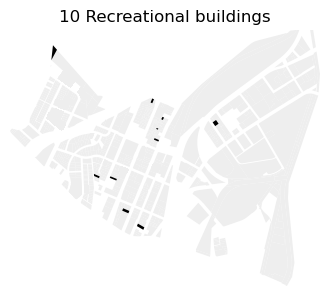

ValueError: cannot convert float NaN to integer

<Figure size 400x400 with 1 Axes>

In [30]:
# loop through building types
for type in buildingtypes:
    fig, ax = plt.subplots(figsize=(4,4))

    # create the map plot
    AD06_clipped.plot(ax=ax,
            # column='building',
            color='#eee')

    # create the map plot
    AD06_clipped[AD06_clipped['UseType'] == type].plot(ax=ax,
            # column='building',
            color='black')

    # set the extent of the map 
    # so that each map has the same bounds
    ax.set_xlim((minx,maxx))
    ax.set_ylim((miny,maxy))

    # add a title
    number_of_buildings = len(AD06_clipped[AD06_clipped['UseType']==type])
    ax.set_title(str(number_of_buildings) + ' ' + type + ' buildings')

    # get rid of the axis
    ax.axis('off');

In [31]:
osm_web_mercator = AD06_clipped.to_crs(epsg=3857)

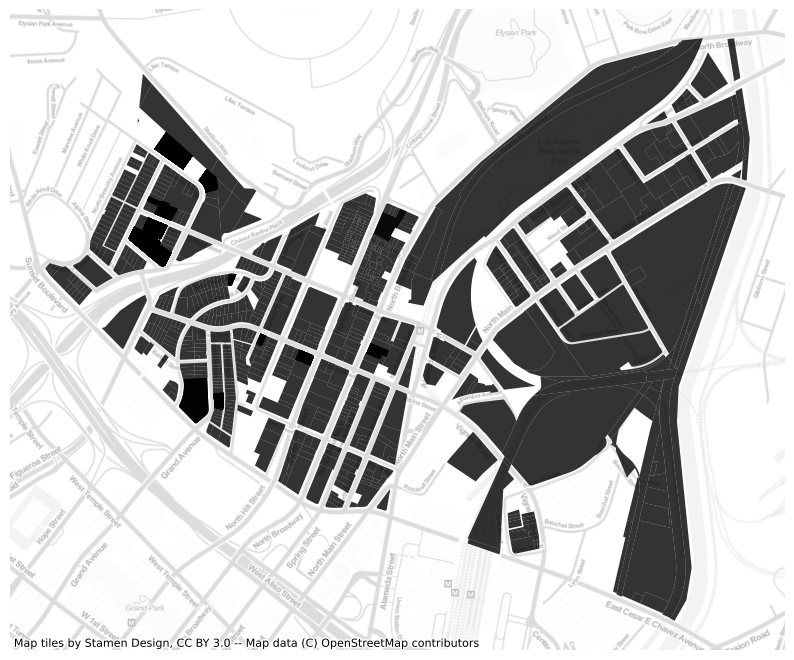

In [32]:
fig,ax = plt.subplots(figsize=(10,10))

osm_web_mercator.plot(ax=ax,
                    color="black",
                    alpha=0.8,
                    )

# get rid of the axis
ax.axis('off');

# basemap from carto that has a dark background (easier to see)
ctx.add_basemap(ax=ax,
                source=ctx.providers.Stamen.TonerLite,
                alpha=0.3 # add transparency to make it less dominant
                )

In [33]:
Years = ['10', '14', '18', '21']

In [35]:
str(Years)

"['10', '14', '18', '21']"

In [36]:
# Create an array of all years of assessor data using for loop
parcel_dataframes = []

for year in Years:
    parcel_data_filepath = "AD" + str(year) + ".geojson"
    parcel_dataframe_raw = gpd.read_file(parcel_data_filepath)
    parcel_dataframe = parcel_dataframe_raw[columns_to_keep].copy()
    parcel_dataframe['Years'] = year
    parcel_dataframes.append(parcel_dataframe)

print(parcel_dataframes[0].info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   SitusAddre    963 non-null    object  
 1   UseType       1105 non-null   object  
 2   UseDescrip    1105 non-null   object  
 3   CENTER_LAT_y  1108 non-null   float64 
 4   CENTER_LON_y  1108 non-null   float64 
 5   geometry      1108 non-null   geometry
 6   Years         1108 non-null   object  
dtypes: float64(2), geometry(1), object(4)
memory usage: 60.7+ KB
None


In [37]:
print(parcel_dataframes[3].sample(5))

           SitusAddre        UseType  \
541       840 YALE ST     Government   
769     759 N HILL ST    Residential   
282              None  Miscellaneous   
565  800 NEW DEPOT ST    Residential   
314              None  Miscellaneous   

                                            UseDescrip  CENTER_LAT_y  \
541                                  Government Parcel     34.064113   
769                                             Single     34.062332   
282  Utility Commercial & Mutual: Pumping Plants St...     34.061938   
565                       Four Units (Any Combination)     34.064841   
314  Utility Commercial & Mutual: Pumping Plants St...     34.061811   

     CENTER_LON_y                                           geometry Years  
541   -118.239627  POLYGON Z ((-118.23904 34.06411 0.00000, -118....    21  
769   -118.240210  POLYGON Z ((-118.23986 34.06245 0.00000, -118....    21  
282   -118.229969  POLYGON Z ((-118.22819 34.06206 0.00000, -118....    21  
565   -118.243131 

In [45]:
print(year)

21


In [49]:
year.tab

AttributeError: 'str' object has no attribute 'tab'